<a href="https://colab.research.google.com/github/Athugodage/RuLawSimplification/blob/main/dataset%20creation%20code/text_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/Athugodage/RuLawSimplification.git

Cloning into 'RuLawSimplification'...
remote: Enumerating objects: 403, done.
remote: Counting objects: 100% (138/138), done.
remote: Compressing objects: 100% (133/133), done.
remote: Total 403 (delta 68), reused 9 (delta 3), pack-reused 265
Receiving objects: 100% (403/403), 207.41 MiB | 13.77 MiB/s, done.
Resolving deltas: 100% (181/181), done.
Updating files: 100% (29/29), done.


In [ ]:
!unzip '/content/RuLawSimplification/corpus/the_corpus.zip'

Archive:  /content/RuLawSimplification/corpus/the_corpus.zip
  inflating: the_corpus.csv          


In [ ]:
import pandas as pd

df = pd.read_csv('the_corpus.csv')

In [ ]:
df.head()

,Название документа,Ссылка,Текст,Комментарий РГ,Date
0,Постановление Конституционного Суда Российской...,https://rg.ru/documents/2022/11/25/document-ob...,Именем Российской Федерации\n Конституционный...,"Бессрочный запрет на профессию для адвокатов, ...",2022-11-25
1,Постановление Пленума Верховного Суда Российск...,https://rg.ru/documents/2022/11/25/document-pl...,В целях обеспечения единства практики применен...,Пленум Верховного суда России утвердил постано...,2022-11-25
2,Федеральный закон от 21 ноября 2022 г. N 455-Ф...,https://rg.ru/documents/2022/11/24/document-po...,Принят Государственной Думой 15 ноября 2022 го...,Единое пособие для беременных женщин и граждан...,2022-11-24
3,Федеральный закон от 21 ноября 2022 г. N 443-Ф...,https://rg.ru/documents/2022/11/24/document-na...,Принят Государственной Думой 10 ноября 2022 го...,На сладкую газировку с 1 июля 2023 года введут...,2022-11-24
4,Федеральный закон от 21 ноября 2022 г. N 448-Ф...,https://rg.ru/documents/2022/11/24/document-by...,Принят Государственной Думой 10 ноября 2022 го...,Приостановленное в этом году бюджетное правило...,2022-11-24


In [ ]:
!pip install razdel
from razdel import sentenize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import re
from tqdm import tqdm

tqdm.pandas()

n = 0

def cut_it(text):
    sents = list(sentenize(text))
    start = len(sents) if len(sents) < 40 else 35

    sents = [s.text for s in sents[-start:] if re.match('(\WN \d+\W ст\W \d{4}\W.* | N \d+ \(.*\).*)', sent.text) is None] 
    
    new_text = ''
    for s in sents:
        if len(s) > 60:
            new_text = new_text + ' ' + s
    return new_text
                


df['Cut_original'] = df['Текст'].progress_apply(cut_it)


100%|██████████| 2022/2022 [00:27<00:00, 73.11it/s] 


In [ ]:
def cut_it(text):
    ## функции отличаются, т.к. в первая режет со второго предложения,
    ## а вторая с первого. Также тут меньше предложений в итоге

    sents = list(sentenize(text))
    end = len(sents) if len(sents) < 30 else 21


    sents = [s.text for s in sents[0:end]] 
    
    new_text = ''
    for s in sents:
        new_text = new_text + ' ' + s
    return new_text
                
df['Cut_comment'] = df['Комментарий РГ'].progress_apply(cut_it)

100%|██████████| 2022/2022 [00:01<00:00, 1497.02it/s]


In [ ]:
data = df.copy()

df = df[['Cut_original', 'Cut_comment']]
df

,Cut_original,Cut_comment
0,"При этом должны использоваться не чрезмерные,...","Бессрочный запрет на профессию для адвокатов,..."
1,"Суд, установив факт нарушения прав потребител...",Пленум Верховного суда России утвердил постан...
2,"В состав семьи, учитываемый при определении п...",Единое пособие для беременных женщин и гражда...
3,"2022, N 27, ст. 4607) следующие изменения:\n ...",На сладкую газировку с 1 июля 2023 года введу...
4,Перечисление средств по таким контрактам (дог...,Приостановленное в этом году бюджетное правил...
...,...,...
2017,Правила по проведению работ в системе сертифи...,Через десять дней автомобиль можно будет пост...
2018,Правительство Российской Федерации постановля...,Правительство утвердило изменения в правила н...
2019,"Установить, что федеральные государственные у...","Правительство приняло постановление, расширяю..."
2020,Утвердить прилагаемые требования к транспортн...,Специфическим образом теперь должны быть раск...


In [ ]:
df['Orig_length'] = df['Cut_original'].apply(lambda x: len(str(x).split(' ')))
df['Comm_length'] = df['Cut_comment'].apply(lambda x: len(str(x).split(' ')))
df.tail(3)

,Cut_original,Cut_comment,Orig_length,Comm_length
2019,"Установить, что федеральные государственные у...","Правительство приняло постановление, расширяю...",1215,379
2020,Утвердить прилагаемые требования к транспортн...,Специфическим образом теперь должны быть раск...,657,400
2021,Исключение патентного поверенного из Реестра ...,В этом году деятельность патентных поверенных...,639,445


In [ ]:
df.agg({'Orig_length': 'mean',
        'Comm_length': 'mean'})

Orig_length    1080.161721
Comm_length     281.921860
dtype: float64

Text(0.5, 1.0, 'Distribution of text length over documents in corpus')

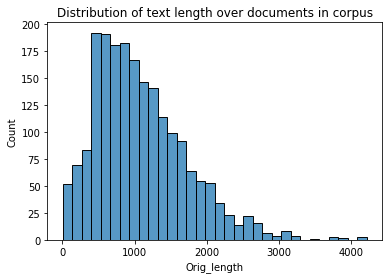

In [ ]:
import seaborn as sns

sns.histplot(df['Orig_length'].dropna()).set_title('Distribution of text length over documents in corpus')

Text(0.5, 1.0, 'Distribution of length over simplified texts')

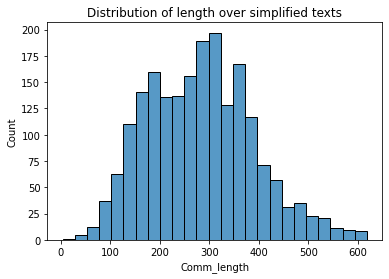

In [ ]:
sns.histplot(df['Comm_length'].dropna()).set_title('Distribution of length over simplified texts')

In [ ]:
df[df['Comm_length'] < 50]

## Sentence #1187 is depreciated, we will delete it

,Cut_original,Cut_comment,Orig_length,Comm_length
83,Принят Государственной Думой 4 марта 2022 год...,Полиция не сможет возбуждать уголовные дела п...,575,31
336,8. Федеральный орган исполнительной власти в ...,Спецификации и технические отчеты должны стат...,780,48
404,В соответствии с частью одиннадцатой статьи 1...,Выплата будет рассчитываться за вычетом средс...,2033,38
916,1. Освободить от занимаемой должности: генер...,Президент РФ Владимир Путин подписал указ о с...,553,40
924,1. Освободить от занимаемой должности: генер...,Президент РФ Владимир Путин подписал указ о с...,553,40
1187,"N 19, ст. 2302, 2306, 2310, 2324, 2325, 2326,...",Какие новации предусмотрены?,701,4


In [ ]:
df = df.drop(index=1187)

In [ ]:
df[df['Orig_length'] < 100]

## эти тоже нужно удалить

,Cut_original,Cut_comment,Orig_length,Comm_length
229,"Видновский лесопарк (квартал 13, природный ко...",- В связи с осложнением ситуации с коронавиру...,75,380
297,"N 44, ст. 6894) слова ""230 частями второй и т...",Как сообщил председатель Комитета Государстве...,19,143
298,"N 44, ст. 6894) слова ""230 частями второй и т...",Как сообщил председатель Комитета Государстве...,19,143
466,"2020, N 12, ст. 1656) следующие изменения: 1...",Военнослужащие при объявлении мобилизации дол...,69,203
553,"N 40, ст. 5488) дополнить словами "", войсках ...",Такие меры предпринимают все структуры - не т...,27,190
587,"N 44, ст. 6175) следующие изменения: 1) в ча...",Еще два-три года назад нелегальным добытчикам...,87,425
623,"N 23, ст. 2905) дополнить пунктом 44 следующе...","Предполагалось, что уже с августа 2019 года к...",64,207
625,"N 23, ст. 2905) дополнить пунктом 44 следующе...","Предполагалось, что уже с августа 2019 года к...",64,207
635,"2019, N 14, ст. 1459) после цифр ""124,"" допол...","Законы, направленные на обеспечение гарантий ...",12,380
667,10 Указ Президента Российской Федерации от 19...,"Напомним, с 1 ноября 2019 года вступают в сил...",89,255


In [ ]:
df = df.drop(index=df[df['Orig_length'] < 100].index.to_list())

In [ ]:
df

,Cut_original,Cut_comment,Orig_length,Comm_length
0,"При этом должны использоваться не чрезмерные,...","Бессрочный запрет на профессию для адвокатов,...",2072,383
1,"Суд, установив факт нарушения прав потребител...",Пленум Верховного суда России утвердил постан...,1423,401
2,"В состав семьи, учитываемый при определении п...",Единое пособие для беременных женщин и гражда...,1725,278
3,"2022, N 27, ст. 4607) следующие изменения:\n ...",На сладкую газировку с 1 июля 2023 года введу...,1489,191
4,Перечисление средств по таким контрактам (дог...,Приостановленное в этом году бюджетное правил...,2212,382
...,...,...,...,...
2017,Правила по проведению работ в системе сертифи...,Через десять дней автомобиль можно будет пост...,830,320
2018,Правительство Российской Федерации постановля...,Правительство утвердило изменения в правила н...,759,505
2019,"Установить, что федеральные государственные у...","Правительство приняло постановление, расширяю...",1215,379
2020,Утвердить прилагаемые требования к транспортн...,Специфическим образом теперь должны быть раск...,657,400


In [ ]:
df['Cut_original'].loc[2000] = df['Cut_original'].loc[2000].strip(' ___________________  1') ## удаляем вручную

<ipython-input-178-725c1551fe76>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cut_original'].loc[2000] = df['Cut_original'].loc[2000].strip(' ___________________  1') ## удаляем вручную


In [ ]:
df['Cut_original'].loc[2000]

'Пункт 24 Положения о формах и порядке проведения государственной (итоговой) аттестации обучающихся, освоивших основные образовательные программы среднего (полного) общего образования, утвержденного приказом Министерства образования и науки Российской Федерации от 28 ноября 2008 г. N 362 (зарегистрирован Министерством юстиции Российской Федерации 13 января 2009 г., регистрационный N 13065). 2Пункт 15 Типового положения об образовательном учреждении среднего профессионального образования (среднем специальном учебном заведении), утвержденного постановлением Правительства Российской Федерации от 18 июля 2008 г. N 543 (Собрание законодательства Российской Федерации, 2008, N 30, ст. 3631). 3 5 6 7Пункт 3 статьи 16 Закона Российской Федерации от 10 июля 1992 г. N 3266-1 "Об образовании" (Ведомости Съезда народных депутатов Российской Федерации и Верховного Совета Российской Федерации, 1992, N 30, ст. 1797; Собрание законодательства Российской Федерации, 1996, N 3, ст.150; 4Пункт 5.2.23.53 По

In [ ]:
save=df[df['Cut_original'].str.contains('^\s*\d+, [N|№]')].index

In [ ]:
for n in df[df['Cut_original'].str.contains('^\s*\d+, [N|№]')==True].index:
    new_text = df['Cut_original'].loc[n].split('\n')
    target = ''
    for t in new_text:
        target.join(t)
    df['Cut_original'].loc[n] = target

<ipython-input-181-6a3667907f85>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cut_original'].loc[n] = target


In [ ]:
df.loc[save[:10]]

,Cut_original,Cut_comment,Orig_length,Comm_length
3,,На сладкую газировку с 1 июля 2023 года введу...,1489,191
15,,Президент России Владимир Путин предоставил м...,1403,264
35,,Фермеры смогут получить в аренду государствен...,1112,172
45,,В России снижаются штрафы за незаконные валют...,1135,416
52,,Иностранные специалисты в области информацион...,364,232
54,,Президент России будет утверждать Корабельный...,142,181
55,,"Наша страна не будет выполнять решения ЕСПЧ, ...",587,402
56,,Случаев закупок госкомпаниями у взаимозависим...,825,114
58,,Тяжеловесному транспорту облегчили участь. Пр...,226,180
71,,Пункты пропуска через госграницу будут вводит...,1631,304


In [ ]:
df[['Cut_original', 'Cut_comment']].to_csv('cut_corpus.csv', index=False)